In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from LoopStructural import GeologicalModel
from LoopStructural.visualisation.model_visualisation import LavaVuModelViewer
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext snakeviz

In [2]:
boundary_points = np.zeros((2,3))
boundary_points[0,0] = -10.
boundary_points[0,1] = -1.
boundary_points[0,2] = -1.
boundary_points[1,0] = 10.
boundary_points[1,1] = 3.
boundary_points[1,2] = 10.

In [3]:
data = pd.read_pickle('duplextesting.pkl')
# data.to_pickle('duplextesting.pkl')

In [4]:
# splay_region = lambda pos : pos[:,0] < (-4.5-model.origin[0])/model.scale_factor
                                         
splay_region = lambda pos : np.logical_or(pos[:,0] < (-6.5-model.origin[0])/model.scale_factor, pos[:,0] 
                                          > (5-model.origin[0])/model.scale_factor)

In [ ]:
model = GeologicalModel(boundary_points[0,:],boundary_points[1,:])
model.set_model_data(data)


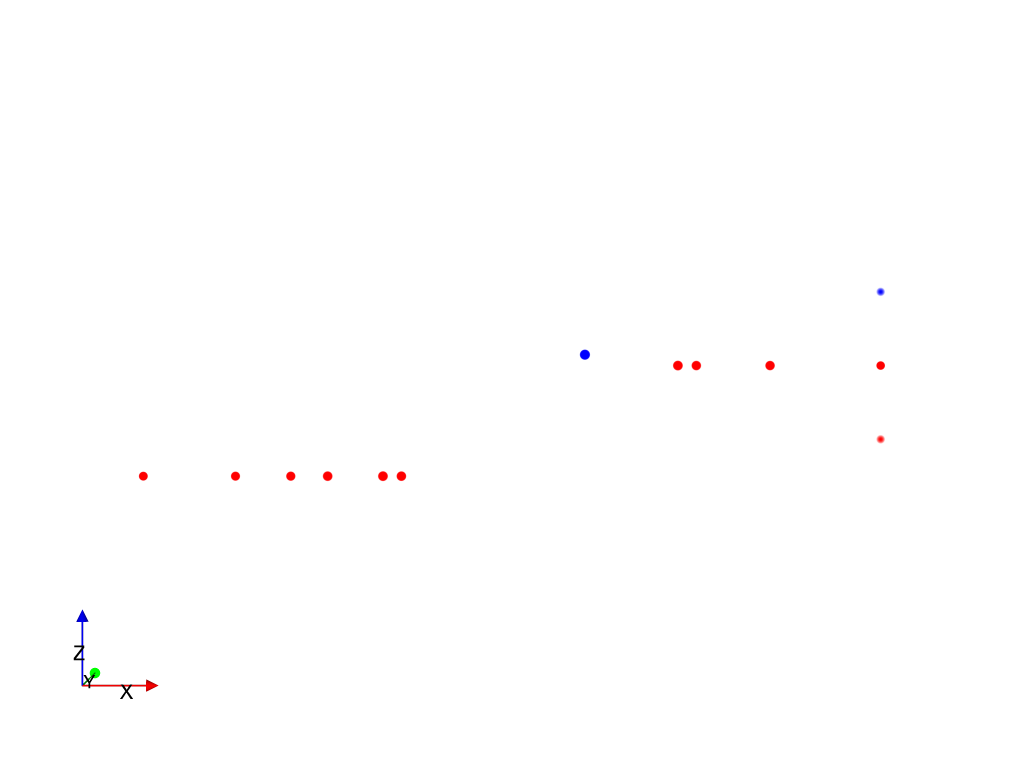

'fault_data.png'

In [59]:
viewer = LavaVuModelViewer(model)

viewer.add_points(model.data[np.logical_and(data['type']=='fault2',data['coord']==0)][['X','Y','Z']],
                  name='f1',pointsize=10,colour='red')

# viewer.add_data(fault1['feature'][0],pointsize=20)
viewer.add_points(model.data[np.logical_and(data['type']=='fault1',data['coord']==0)][['X','Y','Z']],
                  name='f2',pointsize=10,colour='blue')
# viewer.add_data(fault2['feature'][0])
viewer.lv.rotatex(-90)
viewer.lv['xmin'] = -1
viewer.lv['ymin'] = -1
viewer.lv['zmin'] = -1
viewer.lv['xmax'] = 1
viewer.lv['ymax'] = 1
viewer.lv['zmax'] = 1
viewer.lv['border'] = 0

viewer.lv.display()
viewer.lv.image('fault_data.png')

In [5]:

fault1 = model.create_and_add_fault('fault2',
                                    -2.,
                                    nelements=15000,
                                    solver='lu',
                                    interpolatortype='FDI',
                                   damp = True,
#                                     precon=precon,
                                    buffer=np.array([0.5,0.1,0.3]),
                                    regularisation=[2.,.2,.2],
                                    gxxgy=4.,
                                    gxxgz=4.,
                                    gyxgz=4.,
#                                                                         region=interpolation_region
                                    steps=10,
                                    cpw=10
                                   )
# splay_region = lambda pos : np.logical_or(fault1['feature'].apply_to_points(pos)[:,0] < (-4.5-model.origin[0])/model.scale_factor, 
#                                           fault1['feature'].apply_to_points(pos)[:,0] > (4.5-model.origin[0])/model.scale_factor)
fault2 = model.create_and_add_fault('fault1',
                                    -2,
                                    nelements=15000,
                                    solver='lu',
                                    interpolatortype='FDI',
                                   damp = True,
                                    splayregion=splay_region,
                                    splay = fault1['feature'],
                                    regularisation=[2.,.5,.5],
                                    gxxgy=4.,
                                    gxxgz=4.,
                                    gyxgz=4.,
#                                     precon=precon,
                                    buffer=np.array([0.6,0.1,0.2]),
#                                                                         region=interpolation_region
                                    steps=10,
                                    cpw=10
                                   )
strati = model.create_and_add_foliation('strati',
                                        solver='lu',
                                        interpolatortype='FDI', 
                                        nelements=1500,
                                        damp=True,
                                        buffer=np.array([0.8,0.4,0.4])
                                       )

/home/lgrose/python_venv/LoopStructural/lib/python3.6/site-packages/LoopStructural-0.0.0-py3.6-linux-x86_64.egg/LoopStructural/modelling/fault/fault_segment.py:150: RuntimeWarning: invalid value encountered in greater
  d[gx > 0] = 1.
/home/lgrose/python_venv/LoopStructural/lib/python3.6/site-packages/LoopStructural-0.0.0-py3.6-linux-x86_64.egg/LoopStructural/modelling/fault/fault_segment.py:181: RuntimeWarning: invalid value encountered in greater
  d[gx > 0] = 1.


### Figure for Fault 1 showing interpolation nodes for fault 2


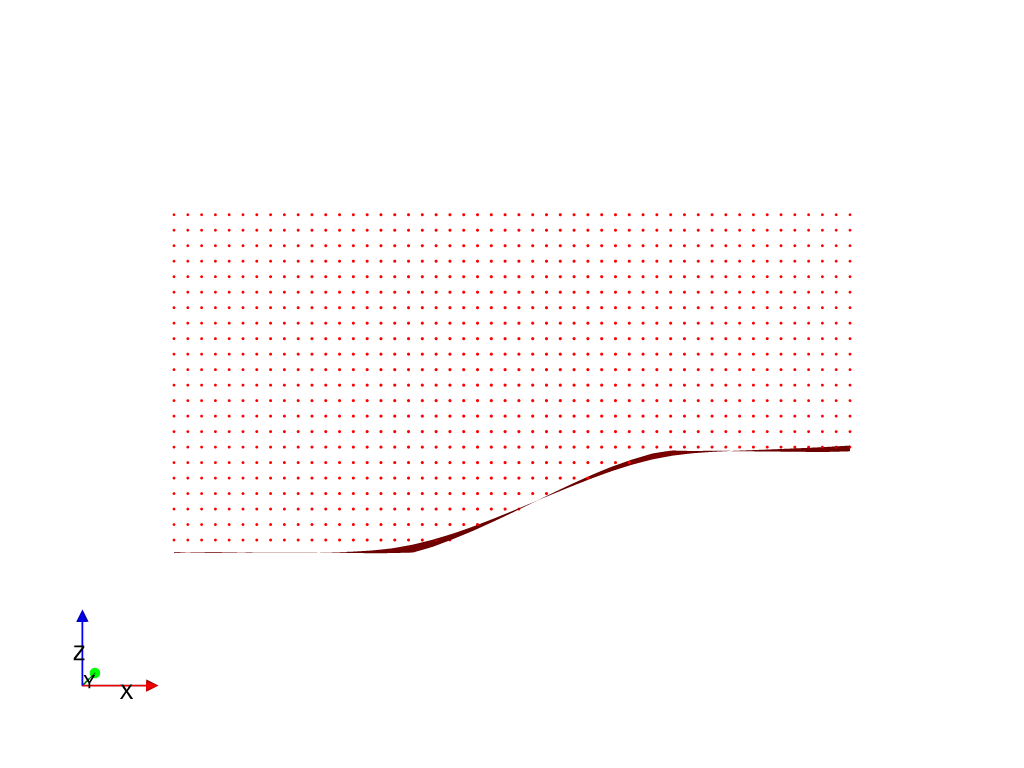

In [41]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(fault1['feature'],
                      isovalue=0,
                      voxet=model.voxet()
                     )
# viewer.add_isosurface(fault2['feature'],
#                       isovalue=0,
#                       voxet=model.voxet()
#                      )
# viewer.add_isosurface(fault1['feature'],
#                       isovalue=0,
# #                       voxet=model.voxet()
#                       name='t1'
#                      )
# viewer.add_isosurface(fault2['feature'],
#                       isovalue=0,
# #                       voxet=model.voxet()
#                       name='t2'
#                      )
nodes = model.regular_grid()#fault2['feature'][0].get_interpolator().support.nodes
nodes  = nodes[fault1['feature'].evaluate(nodes),:]
p = viewer.lv.points('nodes',pointsize=3,colour='red')
p.vertices(nodes)
# nodes = fault1['feature'].apply_to_points(nodes)
# p = viewer.lv.points('nodes_faulted',pointsize=3,colour='blue')
# p.vertices(nodes)
# nodes = fault2['feature'].apply_to_points(nodes)
# p = viewer.lv.points('nodes_faulted2',pointsize=3,colour='blue')
# p.vertices(nodes)

# viewer.add_vector_field(fault1['feature'][1])#,model.regular_grid((25,25,12)))
viewer.lv.rotatex(-90)
viewer.lv['xmin'] = -1
viewer.lv['ymin'] = -1
viewer.lv['zmin'] = -1
viewer.lv['xmax'] = 1
viewer.lv['ymax'] = 1
viewer.lv['zmax'] = 1
viewer.lv['border'] = 0
viewer.lv.image('points_before_fault.png')
viewer.lv.display()

### Figure showing fault 1 displacement field


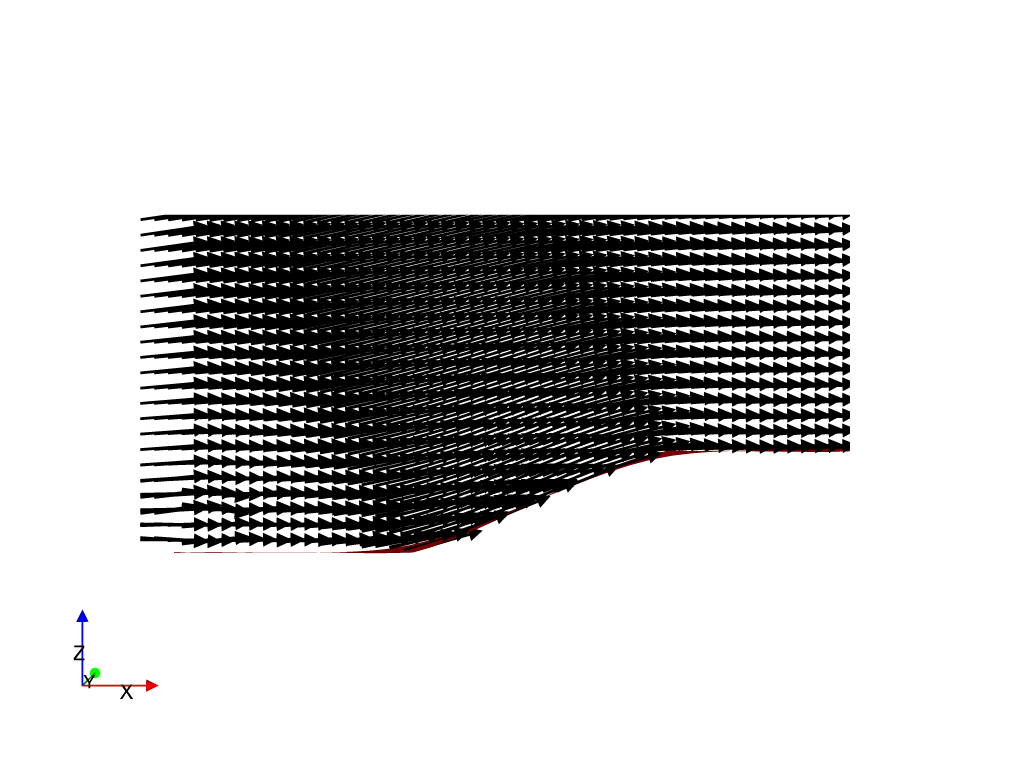

'fault1_displacement_vectors.png'

In [42]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(fault1['feature'],
                      isovalue=0,
                      voxet=model.voxet()
                     )
# viewer.add_isosurface(fault2['feature'],
#                       isovalue=0,
#                       voxet=model.voxet()
#                      )
# viewer.add_isosurface(fault1['feature'],
#                       isovalue=0,
# #                       voxet=model.voxet()
#                       name='t1'
#                      )
# viewer.add_isosurface(fault2['feature'],
#                       isovalue=0,
# #                       voxet=model.voxet()
#                       name='t2'
#                      )
# nodes = model.regular_grid()#fault2['feature'][0].get_interpolator().support.nodes
# nodes  = nodes[fault1['feature'].evaluate(nodes),:]
# p = viewer.lv.points('nodes',pointsize=3,colour='red')
# p.vertices(nodes)
# nodes = fault1['feature'].apply_to_points(nodes)
# p = viewer.lv.points('nodes_faulted',pointsize=3,colour='blue')
# p.vertices(nodes)
# nodes = fault2['feature'].apply_to_points(nodes)
# p = viewer.lv.points('nodes_faulted2',pointsize=3,colour='blue')
# p.vertices(nodes)

viewer.add_vector_field(fault1['feature'][1],locations=nodes)#,model.regular_grid((25,25,12)))
viewer.lv.rotatex(-90)
viewer.lv['xmin'] = -1
viewer.lv['ymin'] = -1
viewer.lv['zmin'] = -1
viewer.lv['xmax'] = 1
viewer.lv['ymax'] = 1
viewer.lv['zmax'] = 1
viewer.lv['border'] = 0

viewer.lv.display()
viewer.lv.image('fault1_displacement_vectors.png')

### Figure for fault 2 surfaces


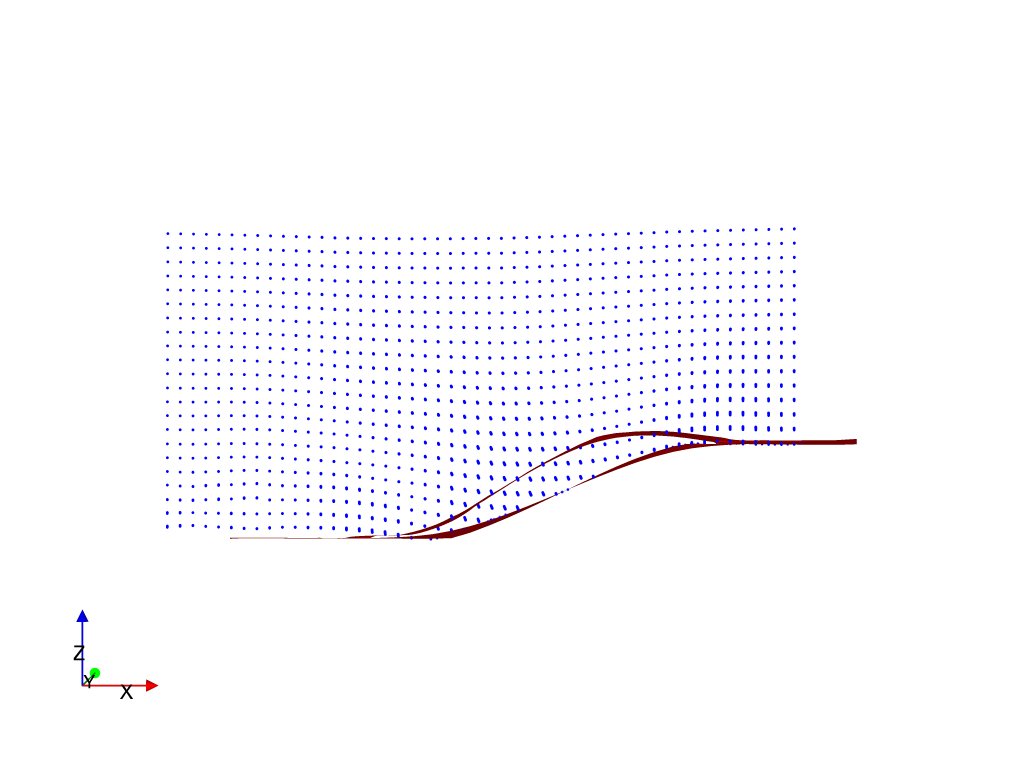

'fault1_point_displaced.png'

In [43]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(fault1['feature'],
                      isovalue=0,
                      voxet=model.voxet()
                     )
viewer.add_isosurface(fault2['feature'],
                      isovalue=0,
                      voxet=model.voxet()
                     )
# viewer.add_isosurface(fault1['feature'],
#                       isovalue=0,
# #                       voxet=model.voxet()
#                       name='t1'
#                      )
# viewer.add_isosurface(fault2['feature'],
#                       isovalue=0,
# #                       voxet=model.voxet()
#                       name='t2'
#                      )
# nodes = model.regular_grid()#fault2['feature'][0].get_interpolator().support.nodes
# nodes  = nodes[fault1['feature'].evaluate(nodes),:]
# p = viewer.lv.points('nodes',pointsize=3,colour='red')
# p.vertices(nodes)
nodes = fault1['feature'].apply_to_points(nodes)
p = viewer.lv.points('nodes_faulted',pointsize=3,colour='blue')
p.vertices(nodes)
# nodes = fault2['feature'].apply_to_points(nodes)
# p = viewer.lv.points('nodes_faulted2',pointsize=3,colour='blue')
# p.vertices(nodes)

# viewer.add_vector_field(fault1['feature'][1])#,model.regular_grid((25,25,12)))
viewer.lv.rotatex(-90)
viewer.lv['xmin'] = -1
viewer.lv['ymin'] = -1
viewer.lv['zmin'] = -1
viewer.lv['xmax'] = 1
viewer.lv['ymax'] = 1
viewer.lv['zmax'] = 1
viewer.lv['border'] = 0

viewer.lv.display()
viewer.lv.image('fault1_point_displaced.png')

### Fault 2 displacement vectors


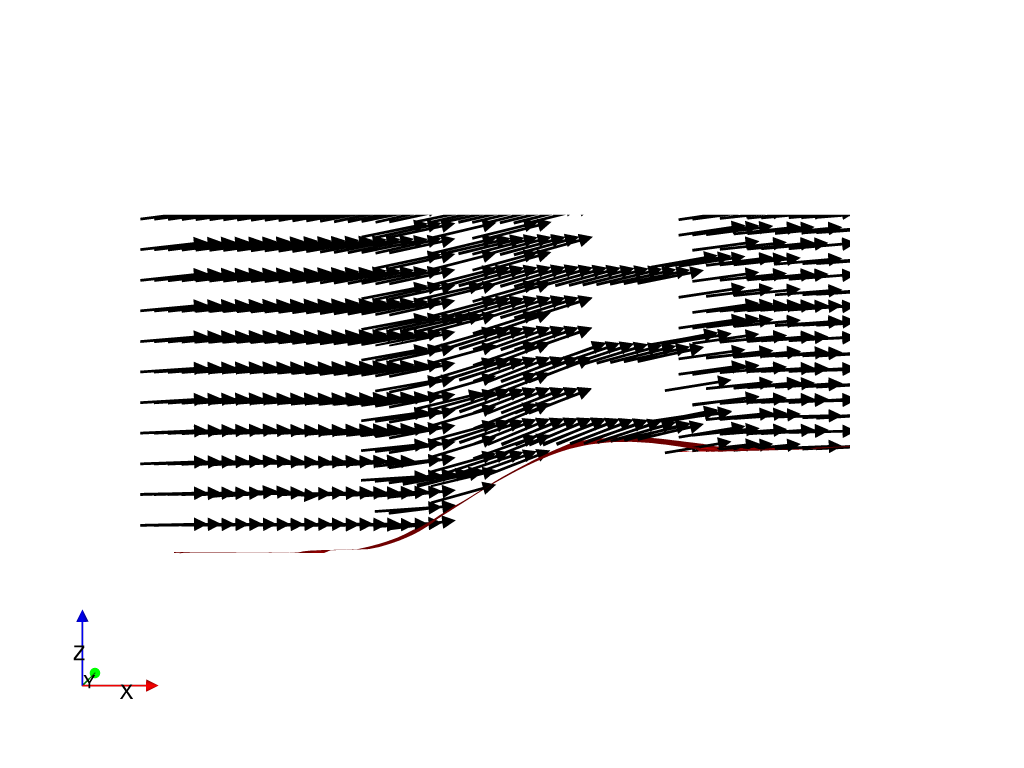

'fault2_displacement_vectors.png'

In [27]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(fault2['feature'],
                      isovalue=0,
                      voxet=model.voxet()
                     )
# viewer.add_isosurface(fault2['feature'],
#                       isovalue=0,
#                       voxet=model.voxet()
#                      )
# viewer.add_isosurface(fault1['feature'],
#                       isovalue=0,
# #                       voxet=model.voxet()
#                       name='t1'
#                      )
# viewer.add_isosurface(fault2['feature'],
#                       isovalue=0,
# #                       voxet=model.voxet()
#                       name='t2'
#                      )
nodes2 = model.regular_grid()#fault2['feature'][0].get_interpolator().support.nodes
nodes2  = nodes2[fault2['feature'].evaluate(nodes2),:]
nodes2 = nodes2[::50]
# p = viewer.lv.points('nodes',pointsize=3,colour='red')
# p.vertices(nodes)
# nodes = fault1['feature'].apply_to_points(nodes)
# p = viewer.lv.points('nodes_faulted',pointsize=3,colour='blue')
# p.vertices(nodes)
# nodes = fault2['feature'].apply_to_points(nodes)
# p = viewer.lv.points('nodes_faulted2',pointsize=3,colour='blue')
# p.vertices(nodes)

viewer.add_vector_field(fault2['feature'][1],locations=nodes2)#,model.regular_grid((25,25,12)))
viewer.lv.rotatex(-90)
viewer.lv['xmin'] = -1
viewer.lv['ymin'] = -1
viewer.lv['zmin'] = -1
viewer.lv['xmax'] = 1
viewer.lv['ymax'] = 1
viewer.lv['zmax'] = 1
viewer.lv['border'] = 0
# viewer.interactive()
viewer.lv.display()
viewer.lv.image('fault2_displacement_vectors.png')

### Figure showing both node movements


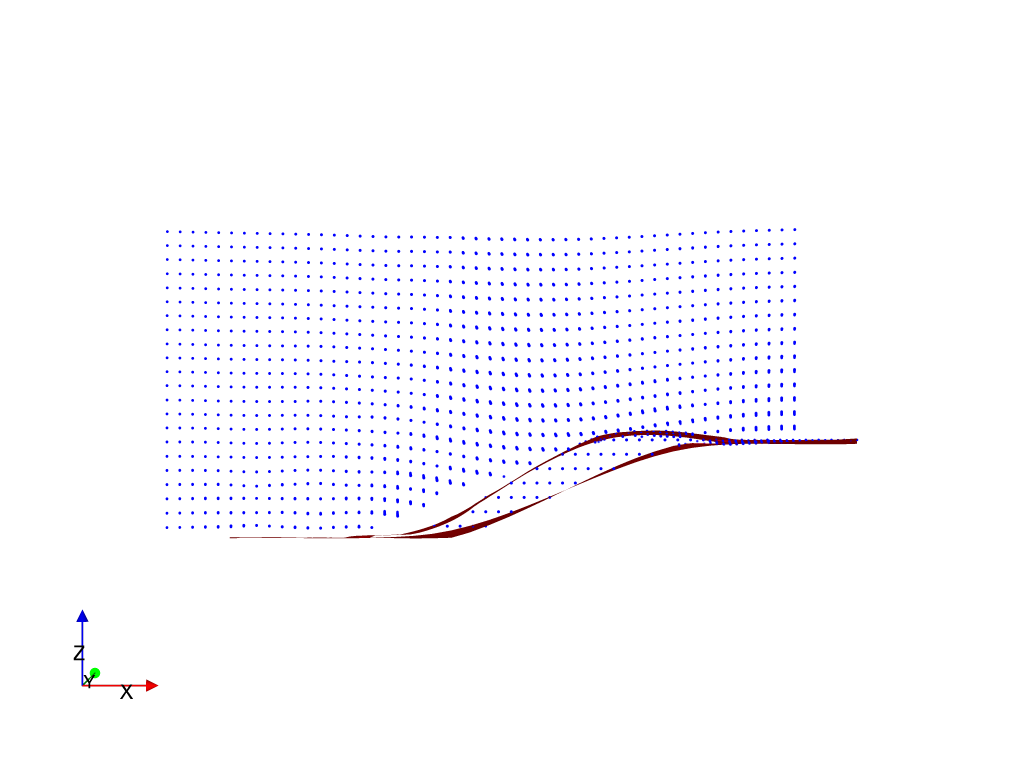

'points_both_fault.png'

In [28]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(fault1['feature'],
                      isovalue=0,
                      voxet=model.voxet()
                     )
viewer.add_isosurface(fault2['feature'],
                      isovalue=0,
                      voxet=model.voxet()
                     )
# viewer.add_isosurface(fault1['feature'],
#                       isovalue=0,
# #                       voxet=model.voxet()
#                       name='t1'
#                      )
# viewer.add_isosurface(fault2['feature'],
#                       isovalue=0,
# #                       voxet=model.voxet()
#                       name='t2'
#                      )
# nodes = model.regular_grid()#fault2['feature'][0].get_interpolator().support.nodes
# nodes  = nodes[fault1['feature'].evaluate(nodes),:]
# p = viewer.lv.points('nodes',pointsize=3,colour='red')
# p.vertices(nodes)
# nodes = fault1['feature'].apply_to_points(nodes)
# p = viewer.lv.points('nodes_faulted',pointsize=3,colour='blue')
# p.vertices(nodes)
nodes = fault2['feature'].apply_to_points(nodes)
p = viewer.lv.points('nodes_faulted2',pointsize=3,colour='blue')
p.vertices(nodes)

# viewer.add_vector_field(fault1['feature'][1])#,model.regular_grid((25,25,12)))
viewer.lv.rotatex(-90)
viewer.lv['xmin'] = -1
viewer.lv['ymin'] = -1
viewer.lv['zmin'] = -1
viewer.lv['xmax'] = 1
viewer.lv['ymax'] = 1
viewer.lv['zmax'] = 1
viewer.lv['border'] = 0

viewer.lv.display()
viewer.lv.image('points_both_fault.png')

### Figure showing data

### Figure showing faults


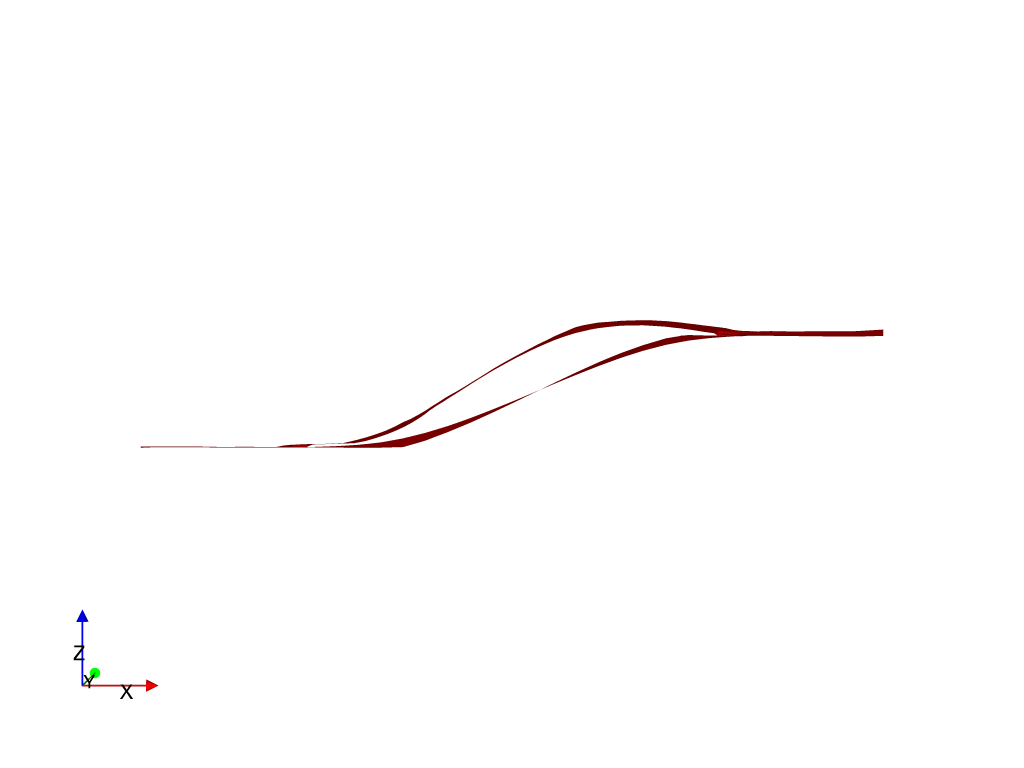

'fault_network.png'

In [16]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(fault1['feature'],
#                       slices=[-1,0,1],
                      isovalue=0,
                     )
viewer.add_isosurface(fault2['feature'],
                      isovalue=0
                     )
# viewer.add_isosurface(fault2['feature'],
# #                       slices=[-1,0,1],
#                       isovalue=0,
# #                       voxet=model.voxet((50,3,20)),
#                       name='t'
#                      )
# viewer.add_isosurface(fault1['feature'],
# #                       slices=[-1,0,1],
#                       isovalue=0,
# #                       voxet=model.voxet((50,3,20)),
#                       name='t3'
#                      )
viewer.lv.rotatex(-90)
viewer.lv['xmin'] = -1
viewer.lv['ymin'] = -1
viewer.lv['zmin'] = -1
viewer.lv['xmax'] = 1
viewer.lv['ymax'] = 1
viewer.lv['zmax'] = 1

viewer.lv['border'] = 0

viewer.lv.display()
viewer.lv.image('fault_network.png')

### Figure showing faulted strati


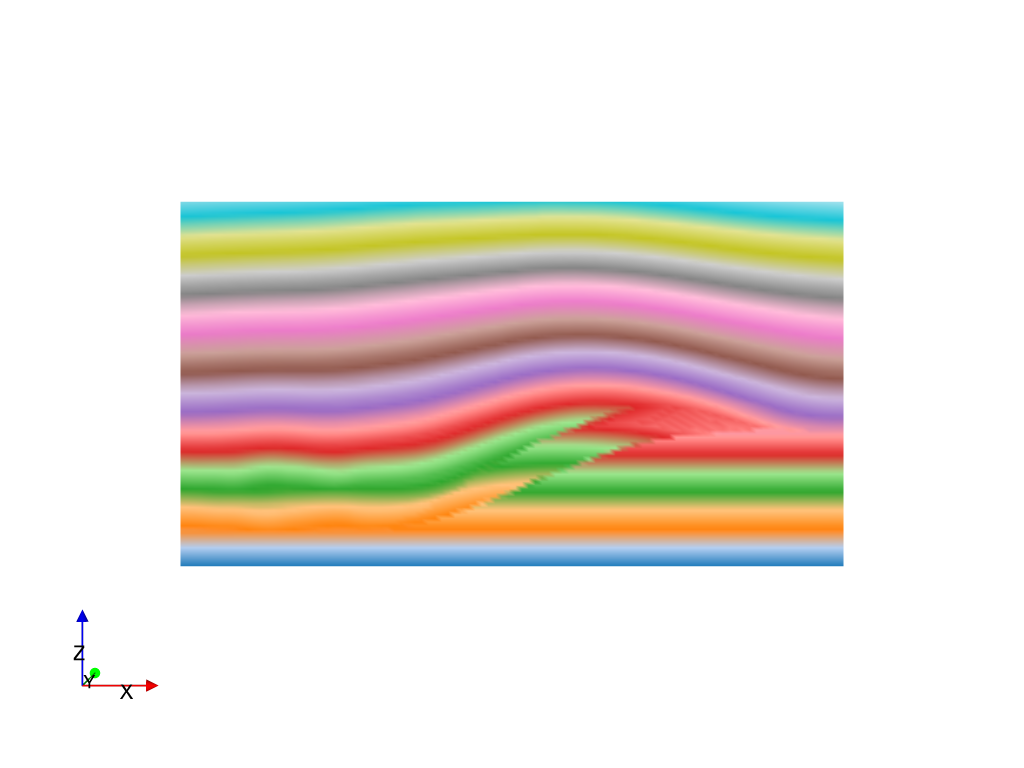

In [49]:
viewer = LavaVuModelViewer(model)
viewer.nsteps = np.array([100,20,100])
viewer.add_scalar_field(strati['feature'],cmap='tab20')
viewer.lv.rotatex(-90)
viewer.lv['xmin'] = -1
viewer.lv['ymin'] = -1
viewer.lv['zmin'] = -1
viewer.lv['xmax'] = 1
viewer.lv['ymax'] = 1
viewer.lv['zmax'] = 1
viewer.lv['border'] = 0
viewer.lv.image('fault_duplex_scalar_field.png')
viewer.lv.display()

### Add all of the plots to a matplotlib figure

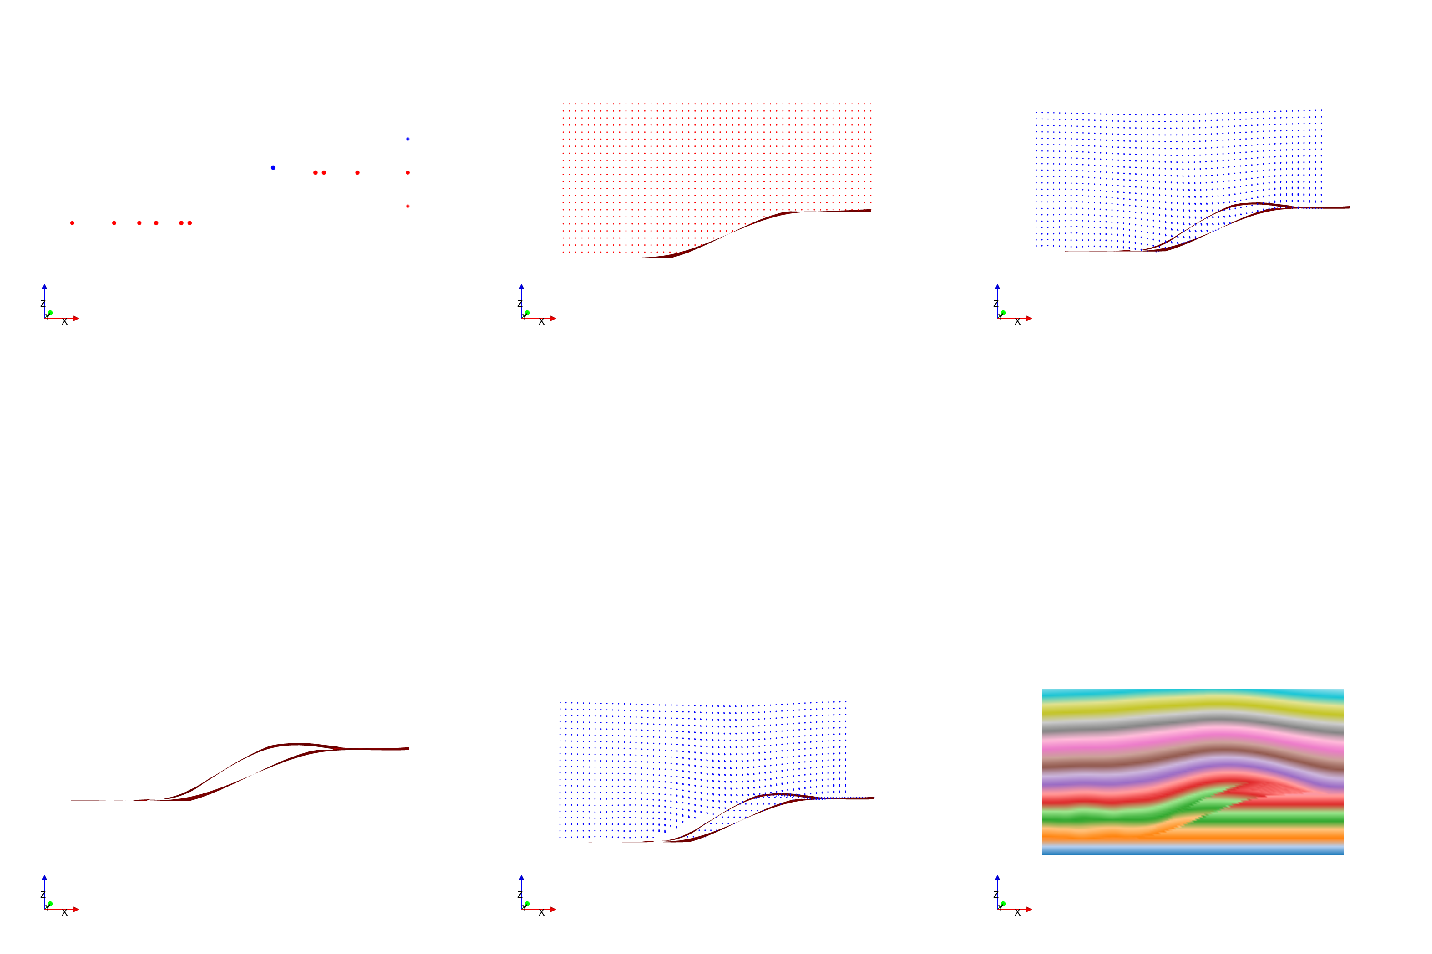

In [60]:
fig, ax = plt.subplots(2,3,figsize=(20,20))
ax[0,0].imshow(plt.imread('fault_data.png'))
ax[0,1].imshow(plt.imread('points_before_fault.png'))
ax[0,2].imshow(plt.imread('fault1_point_displaced.png'))
ax[1,0].imshow(plt.imread('fault_network.png'))

ax[1,1].imshow(plt.imread('points_both_fault.png'))

ax[1,2].imshow(plt.imread('fault_duplex_scalar_field.png'))

for i in range(2):
    for j in range(3):
        ax[i,j].axis('off')
fig.tight_layout()
plt.

In [33]:
import os
os.getcwd()

'/home/lgrose/dev/python/LoopStructural/notebooks/scratch'